<a href="https://colab.research.google.com/github/glaucialr/Portfolio/blob/master/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Lisboa - Portugal*

<p align="center"><img src="http://flyingcarpet.com.br/web/wp-content/uploads/2017/11/img_960x540_portugal_lisboa_001.jpg">
<\>



O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa - Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta analise exploratória inicial, será baixado inicialmente o seguinte arquivo:

*`listings.csv` - *Resumo das informações e métricas para listagens da Cidade de Lisboa.*
 

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-04-29/visualisations/listings.csv")


## Análise dos Dados


Esta etapa tem como objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel.
* `name` - Nome da propriedade anunciada. 
* `host_id` - Número de id do proprietário (anfitrião) da propriedade.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - Esta coluna não contém nenhum valor válido.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada da latitude da propriedade.
* `longitude` - Coordenada da longitude da propriedade.
* `room_type` - Informa o tipo de quarto que é oferecido.
* ` price `- Preço para alugar o imóvel.
* `minimum_nights ` - Quantidade mínima de noites para reservar.
* `number_of_reviews `- Número de reviews que a propriedade possui.
* `last_review ` - Data do último review.
* `reviews_per_month` - Quantidade de reviews por mês.
* `calculated_host_listings_count`- Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias de disponibilidade dentro de 365.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.38,1,307
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.54,1,317
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,321,2020-03-11,2.82,1,351
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,1,239,2020-03-15,2.47,2,318
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,300


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Este *dataset* que está sendo utilizado é a versão resumida do Airbnb. Vamos identificar a quantidade de entradas que o dataset possui e o tipo de cada coluna.
Na mesma página há uma versão mais completa.

In [0]:
# identificar o volume de dados do DataFrame
print ("Entradas:\t {}".format(df.shape[0]))
print ("Variáveis: \t{}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 24640
Variáveis: 	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.
Neste dataset é possivel verificar as seguintes informações a respeito de dados ausentes:


* As variáveis `reviews_per_month ` e `last_review` possuem valores nulos em quase 17% de dados faltantes.
* As variáveis `name` e `host_name` têm aproximadamente 0,7% dos valores nulos.



In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.168547
last_review                       0.168547
name                              0.000771
host_name                         0.000041
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

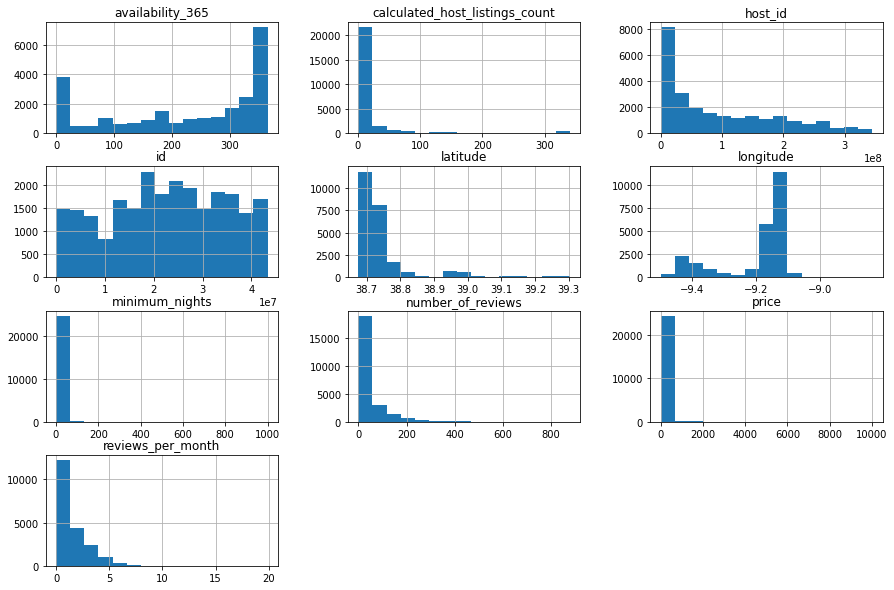

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Para verificar se há presença de outliers podemos utilizar o metodo describe().


### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indicios de outliers. Os valores não seguem uma distribuição, e distorcem a representação gráfica.
Existem duas maneiras que auxiliam a detecção de outliers.
* Resumo estatístico - método describe()
* Plotar boxplots para a variável.


In [0]:
#Resumo estatístico das variaveis numericas 

df[['price','minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24640.000000,24640.000000,24640.000000,20487.000000,24640.000000,24640.000000
mean,110.739732,3.294440,41.781291,1.459542,15.057224,225.239448
std,350.763230,15.970015,65.881125,1.461515,43.355842,132.790977
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,47.000000,1.000000,2.000000,0.320000,1.000000,118.000000
50%,69.000000,2.000000,14.000000,0.960000,3.000000,269.000000
75%,100.000000,3.000000,53.000000,2.210000,10.000000,349.000000
max,10000.000000,1000.000000,877.000000,19.890000,340.000000,365.000000


Podemos ver que:
* `minimum_nights`(quantidade mínima de noites) - possui 75% do valor está abaixo de 03 dias.
* `Price` (preço) -  possui 75% do valor está abaixo de 100 e o valor máximo 10.000.
*`calculated_host_listings_count`(quantidade de imóveis do mesmo anfitrião) possui 75% com valor abaixo de 10.

#### Boxplot para minimum_nights

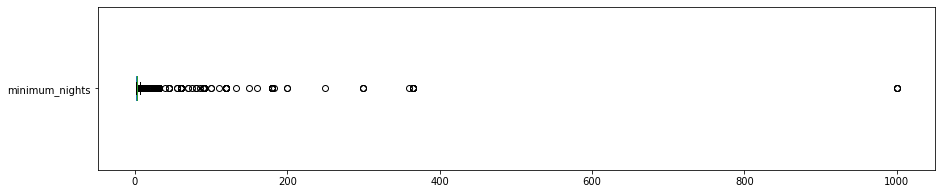

minimum_nights: valores acima de 30:
100 entradas
0.4058%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

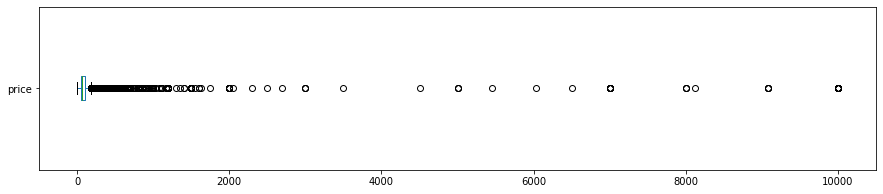


price: valores acima de 1500
57 entradas
0.2313%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


#### **Histograma sem outliers**

* Depois de identificar *outliers* é o momento de limpar o Dataframe para melhor visualização dos dados.
 

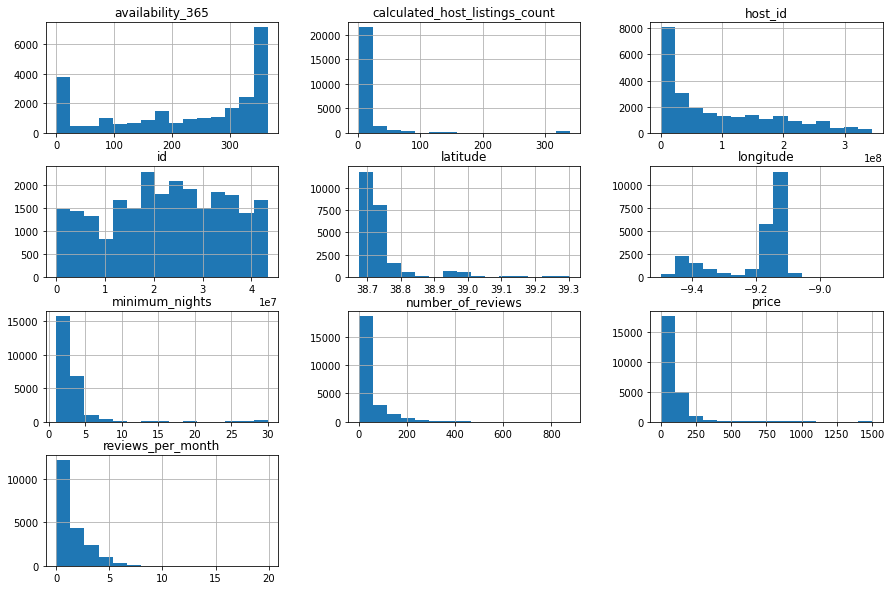

In [0]:
# remover os *outliers* em um novo DataFrame.
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price``
df.price.mean()


110.73973214285714

### **Q6. Qual a correlação existente entre as variáveis**

A correlação significa que existe uma relação entre duas coisas. Vamos buscar a relação ou semelhança das variáveis.

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365' ]].corr()

# mostrar a matriz de correlação
display (corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.031995,-0.122636,-0.121742,-0.026695,0.011067
minimum_nights,-0.031995,1.000000,-0.046396,-0.093987,-0.031211,-0.021399
number_of_reviews,-0.122636,-0.046396,1.000000,0.782149,-0.086487,0.082833
reviews_per_month,-0.121742,-0.093987,0.782149,1.000000,-0.098024,0.076259
calculated_host_listings_count,-0.026695,-0.031211,-0.086487,-0.098024,1.000000,0.047467
availability_365,0.011067,-0.021399,0.082833,0.076259,0.047467,1.000000


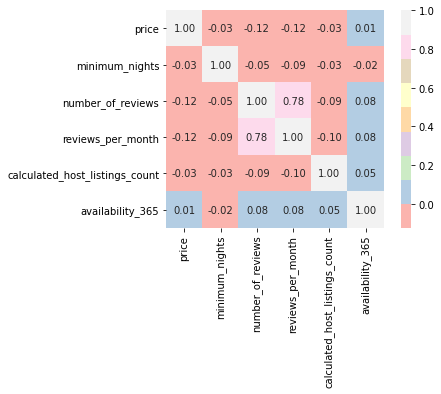

In [0]:
 # plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap= "Pastel1", fmt='.2f', square= True, linecolor = 'white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Para saber qual o tipo de imóvel mais alugado, devemos utilizar a variável `room_type`.
Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método:
`value_counts()`.



In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    17810
Private room        5658
Hotel room           572
Shared room          443
Name: room_type, dtype: int64

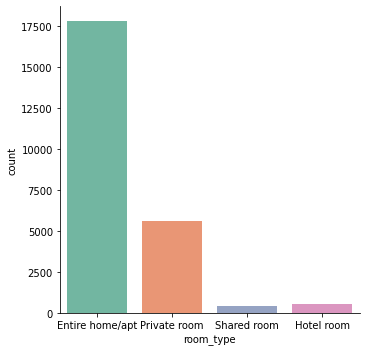

In [0]:
# gráfico mostrando a quantidade de cada tipo de imóvel.

sns.catplot(x='room_type', kind='count', palette="Set2", data=df_clean)

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.727444
Private room       0.231099
Hotel room         0.023363
Shared room        0.018094
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**



No caso da localidade mais cara, usamos a variável `neighbourhood` (bairros) e comparamos a partir do preço da locação.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vermelha                  292.500000
Cardosas                  280.000000
Aveiras de Baixo          269.500000
Ota                       249.000000
Freiria                   220.000000
Peral                     174.800000
Bucelas                   170.300000
So Domingos de Benfica    160.451613
Alcabideche               154.272300
Vale do Paraso            150.000000
Name: price, dtype: float64

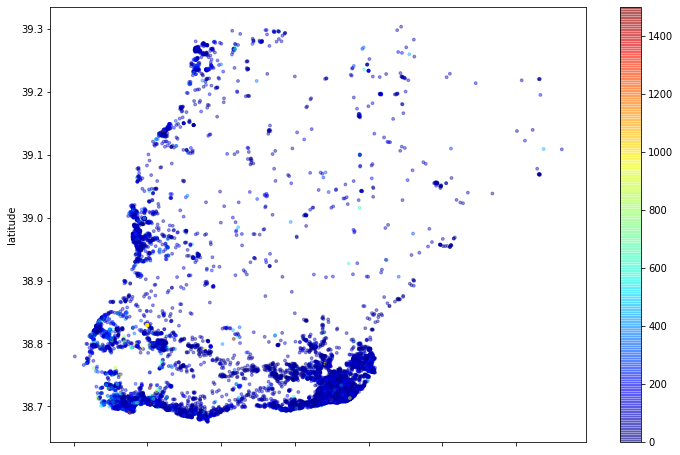

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha = 0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.6894171465915124

## Conclusões


Mesmo sendo realizada uma análise superficial dos dados, podemos verificar que existem `Outliers` em algumas variáveis.
Lembrando que o *dataset* utilizado é uma versão "**Resumida**" disponibilizada pelo Airbnb, ideal para uma abordagem inicial. 
Para uma tomada decisão mais eficaz, recomenda-se o uso do *dataset* completo.